In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("/content/winequality-red.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

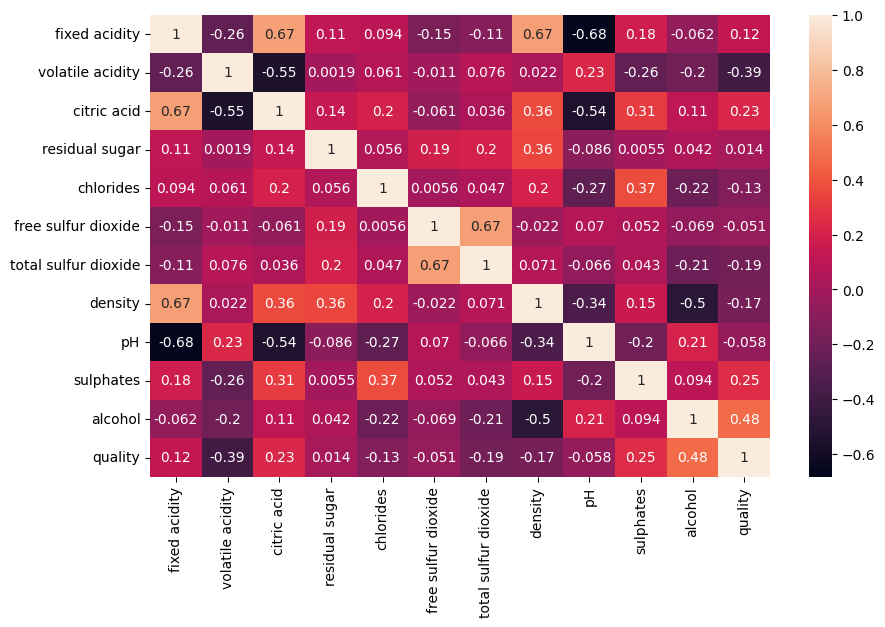

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot = True)

<Axes: xlabel='alcohol', ylabel='pH'>

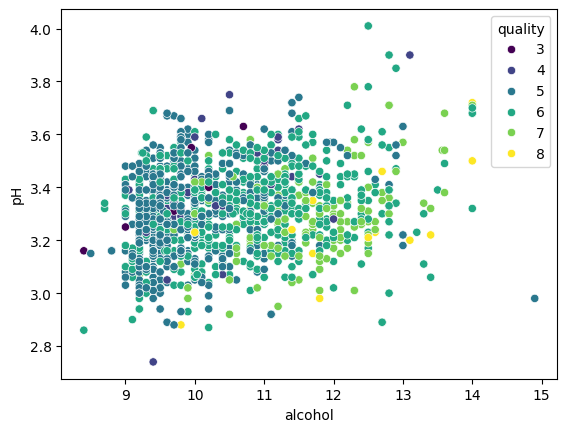

In [35]:
sns.scatterplot(x='alcohol', y='pH', data=data,palette='viridis', hue='quality')

In [ ]:
from sklearn.svm import SVC


In [ ]:
y = data['quality']
X = data.drop('quality', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
moddel = SVC()
moddel.fit(X_train, y_train)

SVC()

In [ ]:
scored = moddel.score(X_test, y_test)
print("Accuracy:", scored)

Accuracy: 0.603125


In [32]:
param = {
    'kernel':['linear', 'rbf', 'poly'],
    'C':[.1,.4,.6, 1,2,3, 10,100,200],

}

In [33]:
svm_grid = GridSearchCV(SVC(),param_grid = param )

In [36]:
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.6, 1, 2, 3, 10, 100, 200],
                         'kernel': ['linear', 'rbf', 'poly']})

In [37]:
svm_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [48]:
svc_new = SVC(kernel='rbf')

In [49]:
svc_new.fit(X_train, y_train)

SVC()

In [50]:
svc_new.score(X_test, y_test)

0.603125

In [51]:
y_pred = svc_new.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 60.31%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320

[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  2  3  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


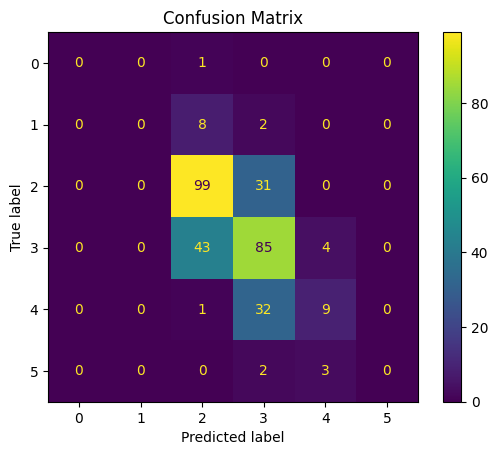

In [58]:
 con = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
 con.plot()
 plt.title("Confusion Matrix")
 plt.show()